In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import math
# import random

from scipy import stats

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

DATA COLLECTION

In [2]:
# 1. Load the data into the python by reading the file in a data frame and check the head of dataframe.

df=pd.read_csv("application.csv")
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,384575,0,Cash loans,M,Y,N,2,207000.0,465457.5,52641.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
1,214010,0,Cash loans,F,Y,Y,0,247500.0,1281712.5,48946.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
2,142232,0,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
3,389171,0,Cash loans,F,N,Y,0,247500.0,254700.0,24939.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,283617,0,Cash loans,M,N,Y,0,112500.0,308133.0,15862.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15371,406895,0,Cash loans,F,Y,Y,1,112500.0,406597.5,31594.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
15372,376623,0,Cash loans,F,N,Y,0,112500.0,254700.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
15373,273086,0,Cash loans,M,N,Y,0,121360.5,1080000.0,29700.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
15374,160442,0,Cash loans,F,Y,Y,0,90000.0,526491.0,32337.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [3]:
df.head()
df.tail()
df.info()
df.describe()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,384575,0,Cash loans,M,Y,N,2,207000.0,465457.5,52641.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
1,214010,0,Cash loans,F,Y,Y,0,247500.0,1281712.5,48946.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
2,142232,0,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
3,389171,0,Cash loans,F,N,Y,0,247500.0,254700.0,24939.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,283617,0,Cash loans,M,N,Y,0,112500.0,308133.0,15862.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
15371,406895,0,Cash loans,F,Y,Y,1,112500.0,406597.5,31594.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
15372,376623,0,Cash loans,F,N,Y,0,112500.0,254700.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
15373,273086,0,Cash loans,M,N,Y,0,121360.5,1080000.0,29700.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
15374,160442,0,Cash loans,F,Y,Y,0,90000.0,526491.0,32337.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
15375,171598,0,Cash loans,M,N,N,0,135000.0,592560.0,32274.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15376 entries, 0 to 15375
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(63), int64(43), object(16)
memory usage: 14.3+ MB


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,15376.000000,15376.000000,15376.000000,1.537600e+04,1.537600e+04,15375.000000,1.536100e+04,15376.000000,15376.000000,15376.000000,...,15376.000000,15376.000000,15376.000000,15376.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000
mean,277931.605619,0.081556,0.425989,1.758758e+05,5.985502e+05,27076.127707,5.376342e+05,0.020977,-16033.042729,62437.988033,...,0.008650,0.000585,0.000520,0.000520,0.007039,0.007863,0.033473,0.276996,0.258125,1.876442
std,102224.492619,0.273695,0.731266,9.470044e+05,4.026963e+05,14493.183809,3.691767e+05,0.014001,4363.268363,140116.572935,...,0.092604,0.024187,0.022805,0.022805,0.090489,0.126054,0.190786,0.944835,0.603122,1.867917
min,100004.000000,0.000000,0.000000,2.700000e+04,4.500000e+04,1980.000000,4.500000e+04,0.000533,-25197.000000,-16607.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190073.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16542.000000,2.385000e+05,0.010006,-19630.000000,-2770.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278047.000000,0.000000,0.000000,1.485000e+05,5.129978e+05,24885.000000,4.500000e+05,0.018850,-15736.500000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,366538.000000,0.000000,1.000000,2.025000e+05,8.086500e+05,34492.500000,6.795000e+05,0.028663,-12379.500000,-294.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456247.000000,1.000000,7.000000,1.170000e+08,4.050000e+06,230161.500000,4.050000e+06,0.072508,-7694.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,8.000000,5.000000,17.000000,5.000000,18.000000


In [ ]:
# Objective:
# As an analyst, your task is to use statistical techniques to derive insights from the dataset. This will involve:
# 1. Descriptive Analysis: Understanding the basic statistical properties of the data, such as central tendency and 
# variability.

# 2. Probability and Sampling: Exploring the probabilities of loan default among
# different segments and testing the robustness of these findings using various sampling techniques.

# 3. Hypothesis Testing: Conducting hypothesis tests to determine the significance of various factors, such as income levels, 
# gender, and ownership status, on loan defaults.

# 4. Distribution Analysis: Examining the distribution of key financial variables to understand their spread and shape, 
# which will guide further statistical analysis.

# 5. Advanced Statistical Testing: Using more sophisticated techniques such as
# ANOVA and chi-square tests to uncover relationships between categorical and numerical variables.

# Expected Outcomes: By the end of this analysis, you should be able to:
# 1. Identify which demographic and financial factors are most strongly associated with loan defaults.
# 2. Determine if there are significant differences between various segments of the population (e.g., based on gender or 
# contract type).
# 3. Validate or refute claims regarding the average values of key financial variables (e.g., income, annuities).
# 4. Provide actionable insights that the financial institution can use to improve its loan approval process, 
# better assess risk, and potentially reduce the rate of defaults.
# 5. This comprehensive statistical analysis will provide a robust foundation for understanding the drivers of 
# loan defaults and guide the financial institution in making data-driven decisions.


In [4]:
# 2. For each categorical column (with unique values up to 20), we'll compute the following statistics:
# 1. Top 1: The most frequent value.
# 2. Top 2: The second most frequent value.
# 3. Top 3: The third most frequent value.
# 4. Mode: The value that appears most frequently.
# 5. Unique Count: The number of unique values.

def categorical_analysis(df):
    categorical_columns = df.select_dtypes(include=["object", "category"]).columns
    compute = pd.DataFrame(columns=["Top 1", "Top 2", "Top 3", "Mode", "Unique Count"])

    for column in categorical_columns:
        if df[column].nunique() <= 20:
            top_values = df[column].value_counts().nlargest(3)
            compute.loc[column, "Top 1"] = top_values.index[0] if top_values.size > 0 else None
            compute.loc[column, "Top 2"] = top_values.index[1] if top_values.size > 1 else None
            compute.loc[column, "Top 3"] = top_values.index[2] if top_values.size > 2 else None
            compute.loc[column, "Mode"] = df[column].mode()[0] if not df[column].mode().empty else None
            compute.loc[column, "Unique Count"] = df[column].nunique()

    return compute



In [5]:
categorical_analysis(df)

,Top 1,Top 2,Top 3,Mode,Unique Count
NAME_CONTRACT_TYPE,Cash loans,Revolving loans,None,Cash loans,2
CODE_GENDER,F,M,None,F,2
FLAG_OWN_CAR,N,Y,None,N,2
FLAG_OWN_REALTY,Y,N,None,Y,2
NAME_TYPE_SUITE,Unaccompanied,Family,"Spouse, partner",Unaccompanied,7
NAME_INCOME_TYPE,Working,Commercial associate,Pensioner,Working,6
NAME_EDUCATION_TYPE,Secondary / secondary special,Higher education,Incomplete higher,Secondary / secondary special,5
NAME_FAMILY_STATUS,Married,Single / not married,Civil marriage,Married,6
NAME_HOUSING_TYPE,House / apartment,With parents,Municipal apartment,House / apartment,6
OCCUPATION_TYPE,Laborers,Sales staff,Core staff,Laborers,18


In [8]:
# 3. For each numerical column, we'll calculate the following statistics:
# 1. 1st Quartile (25th percentile)
# 2. 2nd Quartile (Median or 50th percentile)
# 3. 3rd Quartile (75th percentile)
# 4. Mean
# 5. Median
# 6. Skewness
# 7. Kurtosis
# 8. Standard Deviation
# 9. Variance

def numerical_analysis(df):
    numerical_columns = df.select_dtypes(include=["number"]).columns
    compute=pd.DataFrame(columns=["1st Quartile", "2nd Quartile","3rd Quartile", "Mean", "Median", "Skewness", "Kurtosis", 
                                  "Standard Deviation", "Variance"])

    for column in numerical_columns:
        top_values=df[column].value_counts().nlargest(3)
        compute.loc[column, "1st Quartile"]=df[column].quantile(0.25)
        compute.loc[column, "2nd Quartile"]=df[column].quantile(0.50)
        compute.loc[column, "3rd Quartile"]=df[column].quantile(0.75)
        compute.loc[column, "Mean"]=df[column].mean()
        compute.loc[column, "Median"]=df[column].median()
        compute.loc[column, "Skewness"]=df[column].skew()
        compute.loc[column, "Kurtosis"]=df[column].kurtosis()
        compute.loc[column, "Standard Deviation"]=df[column].std()
        compute.loc[column, "Variance"]=df[column].var()

    return compute

In [9]:
numerical_analysis(df)

,1st Quartile,2nd Quartile,3rd Quartile,Mean,Median,Skewness,Kurtosis,Standard Deviation,Variance
SK_ID_CURR,190073.5,278047.0,366538.0,277931.605619,278047.0,0.005438,-1.188692,102224.492619,10449846891.277298
TARGET,0.0,0.0,0.0,0.081556,0.0,3.058134,7.353142,0.273695,0.074909
CNT_CHILDREN,0.0,0.0,1.0,0.425989,0.0,1.782952,3.168967,0.731266,0.53475
AMT_INCOME_TOTAL,112500.0,148500.0,202500.0,175875.80018,148500.0,122.122444,15065.730464,947004.372378,896817281302.119019
AMT_CREDIT,270000.0,512997.75,808650.0,598550.179858,512997.75,1.298745,2.410188,402696.324232,162164329550.07196
...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,0.0,0.0,0.0,0.007863,0.0,32.009802,1554.926875,0.126054,0.01589
AMT_REQ_CREDIT_BUREAU_WEEK,0.0,0.0,0.0,0.033473,0.0,7.007402,77.228667,0.190786,0.036399
AMT_REQ_CREDIT_BUREAU_MON,0.0,0.0,0.0,0.276996,0.0,7.526564,80.541437,0.944835,0.892713
AMT_REQ_CREDIT_BUREAU_QRT,0.0,0.0,0.0,0.258125,0.0,2.655449,7.911261,0.603122,0.363757


In [10]:
# 4. Let's analyze the probability of loan default based on the gender of the applicant. You will:
# 1. Calculate the probability that a loan application results in default (TARGET = 1) given that the applicant is female.
# 2. Calculate the probability that a loan application results in default (TARGET = 1) given that the applicant is male.

total_applicant=len(df)
total_applicant


female_applicant=df[df["CODE_GENDER"]=="F"]
default_female_applicant=len(female_applicant[female_applicant["TARGET"]==1]) /len(female_applicant)
default_female_applicant

male_applicant=df[df["CODE_GENDER"]=="M"]
default_male_applicant=len(male_applicant[male_applicant["TARGET"]==1]) /len(male_applicant)
default_male_applicant


15376

0.06859771014776397

0.10723288733759938

In [11]:
# 5. Building on the previous task, you'll now calculate:
# 1. The probability that an applicant is female and the loan application results in default.
# 2. The probability that an applicant is male and the loan application results in default.

prob_female_applicant=len(df[(df["CODE_GENDER"]=="F") & (df["TARGET"]==1)]) /total_applicant
prob_female_applicant

prob_male_applicant=len(df[(df["CODE_GENDER"]=="M") & (df["TARGET"]==1)]) /total_applicant
prob_male_applicant

0.04559053069719043

0.035965140478668056

In [13]:
# 6. Finally, let's reverse the perspective using Bayes' Theorem:
# 1. Calculate the probability that an applicant is female given that the loan application resulted in default.

prob_female=len(df["CODE_GENDER"]=="F") /total_applicant

default_female_applicant=len(df[df["TARGET"]==1]) /total_applicant
default_female_applicant

female_applicant=df[df["CODE_GENDER"]=="F"]
default_female_applicant=len(df[(df["CODE_GENDER"]=="F") & (df["TARGET"]==1)]) /len(female_applicant)
default_female_applicant

p_female_given_default = (default_female_applicant * prob_female) / default_female_applicant
p_female_given_default

0.08155567117585848

0.06859771014776397

1.0

In [14]:
# 7. Implement stratified sampling based on the CODE_GENDER column to ensure that your sample represents both genders 
# proportionally. Perform the same analysis as in Task 2 & 3. Analyze the difference in the statistics.
# 1. Implement Stratified Sampling based on gender, ensuring proportional representation.
# 2. Repeat the descriptive statistics and probability analysis with this stratified sample.
# 3. Compare the findings with both the full dataset and the Simple Random Sample.

from sklearn.model_selection import train_test_split

_, stratified_sampling=train_test_split(df, test_size=0.3,stratify=df["CODE_GENDER"], random_state=42)
_, stratified_sampling

stratified_categorical_analysis=categorical_analysis(stratified_sampling)
stratified_categorical_analysis

stratified_numerical_analysis=numerical_analysis(stratified_sampling)
stratified_numerical_analysis


female_stratified_sampling=stratified_sampling[stratified_sampling["CODE_GENDER"]=="F"]
prob_female_stratified_sampling=len(female_stratified_sampling[female_stratified_sampling["TARGET"]==1])/ len(female_stratified_sampling)
prob_female_stratified_sampling

male_stratified_sampling=stratified_sampling[stratified_sampling["CODE_GENDER"]=="M"]
prob_male_stratified_sampling=len(male_stratified_sampling[male_stratified_sampling["TARGET"]==1])/ len(male_stratified_sampling)
prob_male_stratified_sampling

(       SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
 626        227947       0         Cash loans           M            Y   
 10089      303170       0         Cash loans           F            N   
 12947      283817       0    Revolving loans           F            N   
 12948      365803       0         Cash loans           M            Y   
 9736       136678       0         Cash loans           F            N   
 ...           ...     ...                ...         ...          ...   
 8026       220615       0         Cash loans           F            N   
 9713       448813       0         Cash loans           M            Y   
 13313      126224       0         Cash loans           M            Y   
 11284      363361       0         Cash loans           F            N   
 11251      234498       0         Cash loans           F            N   
 
       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
 626                 Y             0    

,Top 1,Top 2,Top 3,Mode,Unique Count
NAME_CONTRACT_TYPE,Cash loans,Revolving loans,None,Cash loans,2
CODE_GENDER,F,M,None,F,2
FLAG_OWN_CAR,N,Y,None,N,2
FLAG_OWN_REALTY,Y,N,None,Y,2
NAME_TYPE_SUITE,Unaccompanied,Family,"Spouse, partner",Unaccompanied,7
NAME_INCOME_TYPE,Working,Commercial associate,Pensioner,Working,4
NAME_EDUCATION_TYPE,Secondary / secondary special,Higher education,Incomplete higher,Secondary / secondary special,5
NAME_FAMILY_STATUS,Married,Single / not married,Civil marriage,Married,6
NAME_HOUSING_TYPE,House / apartment,With parents,Municipal apartment,House / apartment,6
OCCUPATION_TYPE,Laborers,Sales staff,Core staff,Laborers,18


,1st Quartile,2nd Quartile,3rd Quartile,Mean,Median,Skewness,Kurtosis,Standard Deviation,Variance
SK_ID_CURR,189112.0,274833.0,364581.0,276866.741383,274833.0,0.0338,-1.179526,102019.868082,10408053483.51528
TARGET,0.0,0.0,0.0,0.082809,0.0,3.028559,7.175277,0.275624,0.075969
CNT_CHILDREN,0.0,0.0,1.0,0.420767,0.0,1.748462,2.64086,0.726211,0.527383
AMT_INCOME_TOTAL,112500.0,153000.0,202500.0,167826.929681,153000.0,2.612989,18.150813,91236.123129,8324030163.64993
AMT_CREDIT,270000.0,518562.0,808650.0,594956.842619,518562.0,1.178077,1.500533,398097.452093,158481581363.06488
...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,0.0,0.0,0.0,0.007789,0.0,13.63222,207.830476,0.096115,0.009238
AMT_REQ_CREDIT_BUREAU_WEEK,0.0,0.0,0.0,0.029899,0.0,5.670765,31.289942,0.171801,0.029515
AMT_REQ_CREDIT_BUREAU_MON,0.0,0.0,0.0,0.274623,0.0,7.63965,82.765438,0.975296,0.951203
AMT_REQ_CREDIT_BUREAU_QRT,0.0,0.0,0.0,0.25201,0.0,2.637386,7.494766,0.595331,0.354419


0.06979778212654925

0.1085972850678733

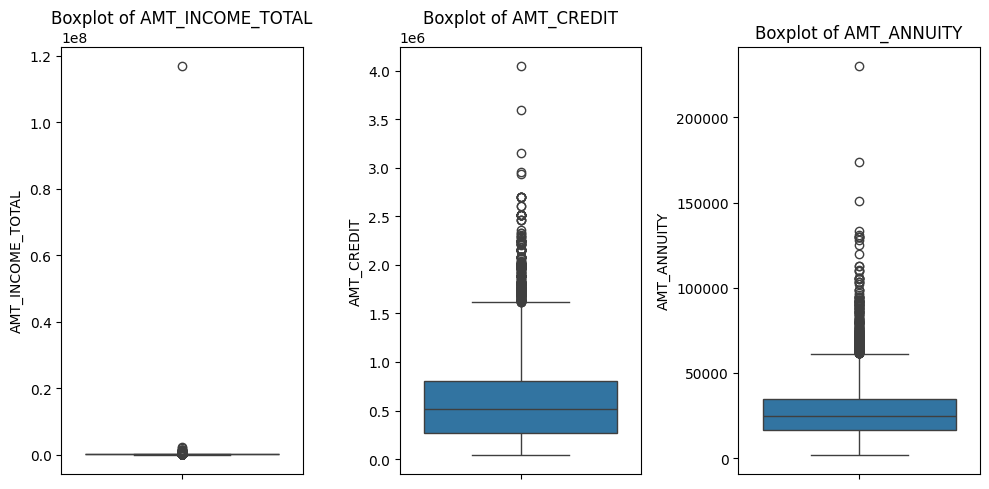

In [15]:
# 8. Treating the outliers
# 1. Visualize the presence of outliers in the 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY" columns using box plots. 
# (Create a function to visualize outliers)
# 2. Identify which columns have significant outliers.

import matplotlib.pyplot as plt
import seaborn as sns 


def visualize_outliers(df, columns):
    plt.figure(figsize=(10, 5))
    for i, column in enumerate(columns, 1):
        plt.subplot(1, len(columns), i)
        sns.boxplot(y=df[column])
        plt.title(f"Boxplot of {column}")
    plt.tight_layout()
    plt.show()


columns_to_check = ["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY"]
visualize_outliers(df, columns_to_check)


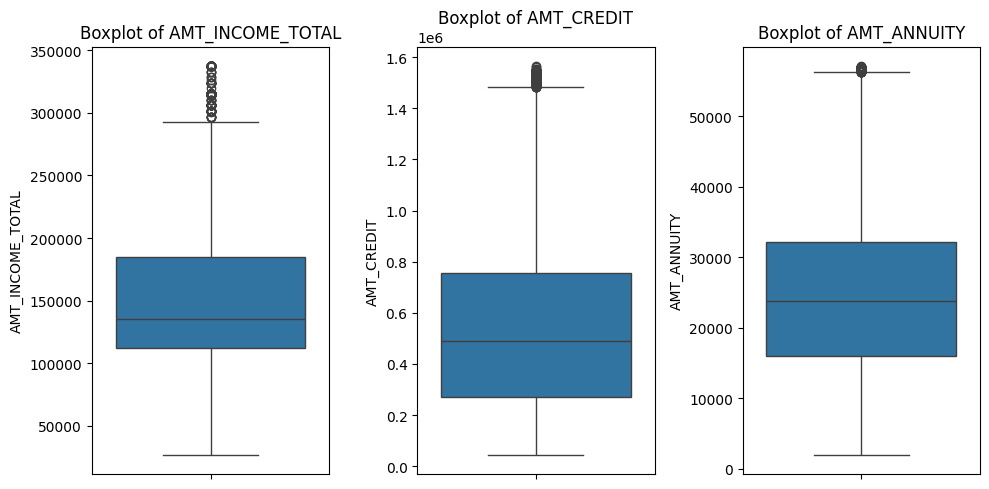

In [17]:
# 9. Removing the outliers (write a function to remove outliers)
# 1. After visualizing, remove the outliers from the identified columns (AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY) 
# using the IQR
# (Interquartile Range) method.
# 2. Re-visualize the distributions of the cleaned columns to confirm the outliers have been removed. 
# (using the function created in the above question)

def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


application_df_cleaned = remove_outliers_iqr(df, columns_to_check)
visualize_outliers(application_df_cleaned, columns_to_check)


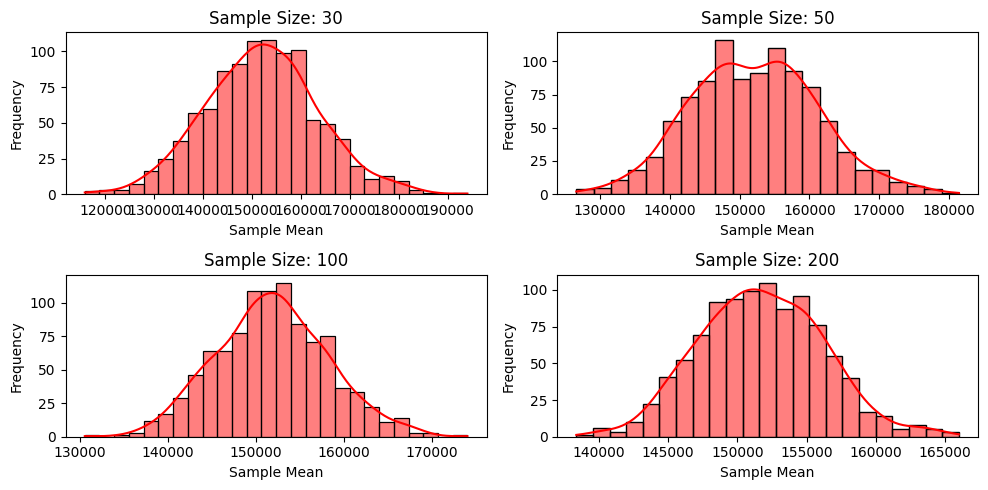

In [19]:
# 10. Evaluate the Impact of Sample size on overall mean (create a function to do this)
# 1. Draw samples of different sizes from the AMT_INCOME_TOTAL column.
# 2. Investigate how the distribution of sample means changes as you increase the sample size.
# 3. Visualize the results

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


def sample_sixe_mean(df, column, sample_sizes, num_samples=1000):
    plt.figure(figsize=(10,5))
    for i, size in enumerate(sample_sizes, 1):
        sample_means = [df[column].sample(size, replace=True).mean() for _
        in range(num_samples)]
        plt.subplot(2, 2, i)
        sns.histplot(sample_means, kde=True, color="red")
        plt.title(f"Sample Size: {size}")
        plt.xlabel("Sample Mean")
        plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


sample_sizes = [30, 50, 100, 200]
sample_sixe_mean(application_df_cleaned, "AMT_INCOME_TOTAL", sample_sizes)


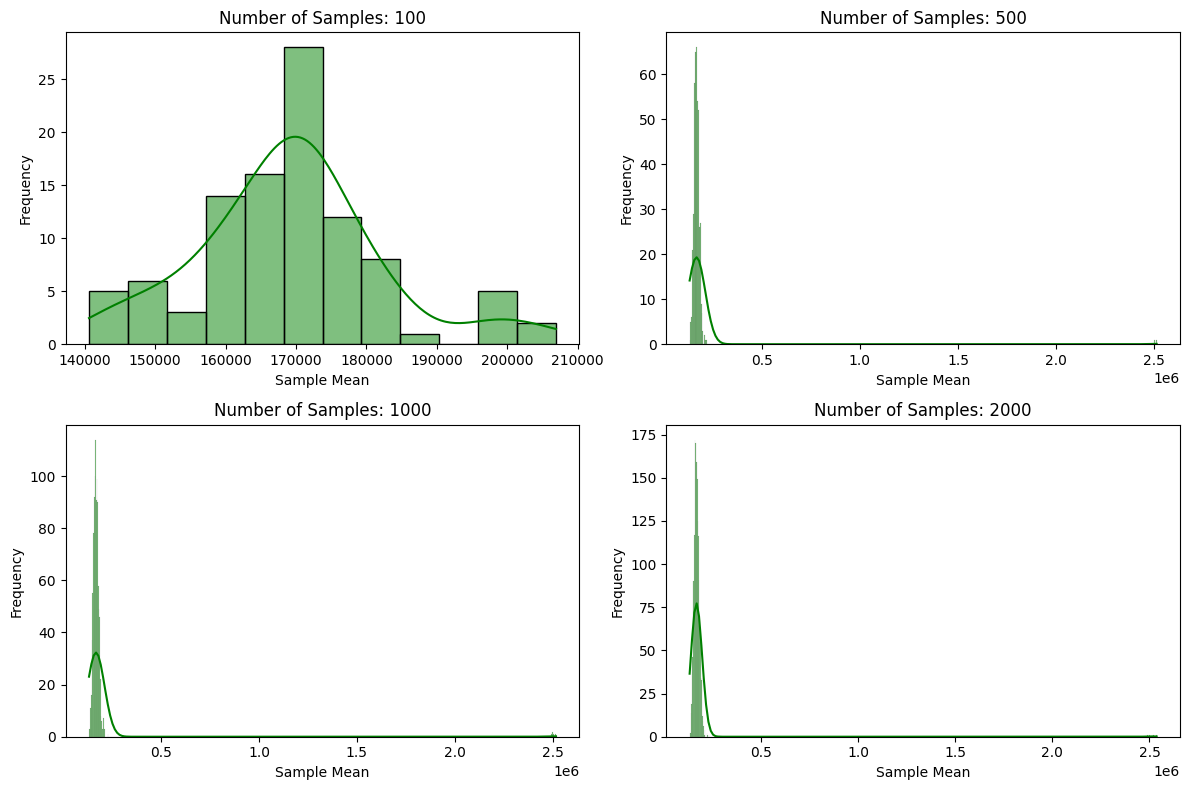

In [20]:
# 11. Evaluate the Impact of number of samples
# 1. With a fixed sample size, draw different numbers of samples.
# 2. Explore how the distribution of sample means evolves as the number of samples increases.
# 3. Visualize the results

def evaluate_num_samples_impact(df, column, sample_size, num_samples_list):
    plt.figure(figsize=(12, 8))
    for i, num_samples in enumerate(num_samples_list, 1):
        sample_means = [df[column].sample(sample_size, replace=True).mean()
        for _ in range(num_samples)]
        plt.subplot(2, 2, i)
        sns.histplot(sample_means, kde=True, color="green")
        plt.title(f"Number of Samples: {num_samples}")
        plt.xlabel("Sample Mean")
        plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

num_samples_list = [100, 500, 1000, 2000]
evaluate_num_samples_impact(df, "AMT_INCOME_TOTAL", 50, num_samples_list)

In [21]:
# 12. Is the average AMT_INCOME_TOTAL of loan applicants significantly different from a hypothesized population mean of 
# $160,000? (One-sample t-test)

from scipy.stats import ttest_1samp

x=160000

sample = df["AMT_INCOME_TOTAL"].dropna()

t_stat, p_value = ttest_1samp(sample, x)
t_stat, p_value 

if p_value < 0.05:
    print("Reject the null hypothesis: The average AMT_INCOME_TOTAL is significantly different from $160,000.")
else:
    print("Fail to reject the null hypothesis: No significant difference from the hypothesized mean of $160,000.")

(np.float64(2.0787646601846475), np.float64(0.0376555272664873))

Reject the null hypothesis: The average AMT_INCOME_TOTAL is significantly different from $160,000.


In [22]:
# 13. What are the 95% confidence intervals for the mean AMT_CREDIT for all loan applicants?

import numpy as np
import scipy.stats as stats

confidence_interval = 0.95
a=0.05

mean_amt_credit = np.mean(df["AMT_CREDIT"])
std_err_amt_credit = stats.sem(df["AMT_CREDIT"])

confidence_interval = stats.t.interval(0.95, len(df["AMT_CREDIT"])-1, loc=mean_amt_credit, scale=std_err_amt_credit)
confidence_interval
print(f"95% Confidence Interval for AMT_CREDIT: {confidence_interval}")

(np.float64(592184.5957399751), np.float64(604915.7639764661))

95% Confidence Interval for AMT_CREDIT: (np.float64(592184.5957399751), np.float64(604915.7639764661))


In [24]:
# 14. Is there a significant difference in AMT_ANNUITY across different types of contract (NAME_CONTRACT_TYPE)? (ANOVA)
from scipy.stats import f_oneway

groups = [group["AMT_ANNUITY"].dropna() for name, group in df.groupby("NAME_CONTRACT_TYPE")]

f_stat, p_value = f_oneway(*groups)
f_stat, p_value

if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in AMT_ANNUITY across contract types.")
else:
    print("Fail to reject the null hypothesis: No significant difference in AMT_ANNUITY across contract types.")

(np.float64(1038.0932971542532), np.float64(1.8761602511032413e-220))

Reject the null hypothesis: Significant difference in AMT_ANNUITY across contract types.


In [25]:
# 15. Is there an association between gender (CODE_GENDER) and loan default (TARGET)? (Chi-square test)
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df["CODE_GENDER"], df["TARGET"])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
chi2_stat, p_value, dof, expected

if p_value < 0.05:
    print("Reject the null hypothesis: There is an association between gender and loan default.")
else:
    print("Fail to reject the null hypothesis: No significant association between gender and loan default.")

(np.float64(67.78522275857772),
 np.float64(1.823107293272869e-16),
 1,
 array([[9385.58259625,  833.41740375],
        [4736.41740375,  420.58259625]]))

Reject the null hypothesis: There is an association between gender and loan default.


In [26]:
# 16. Which categorical variables are not significantly associated with loan default? (Chi-Square Test)
# 1. Categorical Variables:
# 1. CODE_GENDER
# 2. FLAG_OWN_CAR
# 3. FLAG_OWN_REALTY
# 4. NAME_CONTRACT_TYPE

from scipy.stats import chi2_contingency

categorical_vars = ["CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_CONTRACT_TYPE"]

for var in categorical_vars:
    contingency_table = pd.crosstab(df[var], df["TARGET"])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
chi2_stat, p_value, dof, expected

if p_value < 0.05:
    print(f" - {var} is significantly associated with loan default (important).\n")
else:
    print(f" - {var} is NOT significantly associated with loan default (not important).\n")


(np.float64(12.336565505459765),
 np.float64(0.0004441714563195563),
 1,
 array([[12802.19549948,  1136.80450052],
        [ 1319.80450052,   117.19549948]]))

 - NAME_CONTRACT_TYPE is significantly associated with loan default (important).



In [27]:
# 17. Is the average loan amount (AMT_CREDIT) for female applicants within the 95% confidence interval of the overall 
# average loan amount for all applicants?

confidence_interval = 0.95
a = 0.05

mean_amt_credit = np.mean(df["AMT_CREDIT"])
se_amt_credit = stats.sem(df["AMT_CREDIT"])
confidence_interval = stats.t.interval(0.95, len(df["AMT_CREDIT"])-1, loc=mean_amt_credit, scale=se_amt_credit)

mean_amt_credit_female = np.mean(df[df["CODE_GENDER"] == "F"]["AMT_CREDIT"])
mean_amt_credit_female

if confidence_interval[0] <= mean_amt_credit_female <= confidence_interval[1]:
    print("The mean AMT_CREDIT for female applicants falls within the 95% confidence interval of the overall mean.")
else:
    print("The mean AMT_CREDIT for female applicants does not fall within the 95% confidence interval of the overall mean.")


np.float64(596506.7228202368)

The mean AMT_CREDIT for female applicants falls within the 95% confidence interval of the overall mean.


In [28]:
# 18. Does the 95% confidence interval for the mean income (AMT_INCOME_TOTAL) of applicants who own a car overlap with 
# those who do not?

confidence_interval = 0.95
a = 0.05

car_owner = df[df["FLAG_OWN_CAR"]=="Y"]["AMT_INCOME_TOTAL"].dropna()
mean_car_owner = car_owner.mean()
sem_car_owner = stats.sem(car_owner)

non_car_owner = df[df["FLAG_OWN_CAR"]=="N"]["AMT_INCOME_TOTAL"].dropna()
mean_non_car_owner = non_car_owner.mean()
sem_non_car_owner = stats.sem(non_car_owner)

ci_car_owners = stats.t.interval(confidence_interval, len(car_owner)-1, loc=mean_car_owner, scale=sem_car_owner)
ci_non_car_owners = stats.t.interval(confidence_interval, len(non_car_owner)-1, loc=mean_non_car_owner, scale=sem_non_car_owner)
ci_car_owners, ci_non_car_owners


((np.float64(191057.2755338288), np.float64(196930.51992508981)),
 (np.float64(144063.36493725033), np.float64(189187.44890890352)))

In [31]:
# 19. Consider the average AMT_ANNUITY for all applicants. Suppose a financial analyst claims that the mean annuity amount 
# should be $30,000 based on industry standards. Conduct a one-sample t-test to evaluate this claim. Discuss your approach, 
# assumptions, and the implications of your findings.

from scipy.stats import ttest_1samp
import numpy as np

u = 30000
amt_annuity= df["AMT_ANNUITY"].dropna()

t_stat_annuity, p_value_annuity = ttest_1samp(amt_annuity, u)
t_stat_annuity, p_value_annuity

if p_value_annuity < 0.05:
    print("Reject the null hypothesis: The mean AMT_ANNUITY is significantly different from $30,000.")
else:
    print("Fail to reject the null hypothesis: The mean AMT_ANNUITY is not significantly different from $30,000.")

(np.float64(-25.015095307439868), np.float64(2.1049366456037717e-135))

Reject the null hypothesis: The mean AMT_ANNUITY is significantly different from $30,000.


In [34]:
# 20. The dataset includes the AMT_INCOME_TOTAL column, representing the total income of applicants. Assume that the 
# government has set a minimum income threshold of $180,000 for a specific loan program. Using a one-sample t-test, 
# determine whether the average income of the applicants in the dataset significantly differs from this threshold. 
# Explain your methodology, interpretation, and any potential limitations of your analysis.

u = 180000
amt_income_total = df["AMT_INCOME_TOTAL"].dropna()

t_stat_income, p_value_income = ttest_1samp(amt_income_total, u)
t_stat_income, p_value_income

if p_value_income < 0.05:
    print("Reject the null hypothesis: The mean AMT_INCOME_TOTAL is significantly different from $180,000.")
else:
    print("Fail to reject the null hypothesis: The mean AMT_INCOME_TOTAL is not significantly different from $180,000.")


(np.float64(-0.5400194471936721), np.float64(0.589191442339712))

Fail to reject the null hypothesis: The mean AMT_INCOME_TOTAL is not significantly different from $180,000.
